In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import itertools
sys.path.append("/mnt/ssd/NMRlipids_VI-NewIonModel/scripts/")
import calcOrderParameters as cop
import fnmatch
import re
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [21]:
def locate(pattern, root=os.curdir):
    '''Locate all files matching supplied filename pattern in and below
    supplied root directory.'''
    for path, dirs, files in os.walk(os.path.abspath(root)):
        for filename in fnmatch.filter(files, pattern):
            yield os.path.join(path, filename)
            

In [22]:
class Simulation():
    '''Simulation class stores simulation data relevant for NMRlipids project 6'''
    def __init__(self, dirname, 
                 ordpars_fname="OrdPars.dat", 
                 dens_fname="density_ca_cl_water.xvg", 
                 conc_bulk_fname="conc_ion_bulk_mmolL.dat", 
                 conc_nominal_fname="conc_ion_nominal_mmolL.dat"):
        self.dirname = dirname
        self.ordpars = cop.parse_op_input(os.path.join(dirname, ordpars_fname))
        try:
            self.dens    = np.loadtxt(os.path.join(dirname, dens_fname))
            self.conc_bulk = np.loadtxt(os.path.join(dirname, conc_bulk_fname))
            self.conc_nominal = np.loadtxt(os.path.join(dirname, conc_nominal_fname))
        except:
            print "Simulation in \n {d} \n has no densities or files with concentrations, setting concentrations to 0.".format(d=self.dirname)
            self.conc_bulk = np.zeros([2])
            self.conc_nominal = 0.0
                    

Finding all simulations with ECC-lipids and cationic surfactant

In [23]:
sim_dirs = []
for f in locate("OrdPars.dat", root=os.curdir+"/NpT"):
    if "sim22a_0mM" in f and "NaCl" in f and "OPC3" in f:
        sim_dirs.append(os.path.dirname(f))
    if "sim22_T7H-ECC" in f and "OPC3" in f:
        sim_dirs.append(os.path.dirname(f))

for f in sim_dirs:
    if "300K" in f:
        sim_dirs.remove(f)
        
sim_dirs.sort()
#print sim_dirs

In [24]:
sims = []
for d in sim_dirs:
    sim = Simulation(d)
    sims.append(sim)

Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim22_T7H-ECC-20p_OPC3_non-tail-atoms_q-sc_0.80_sig-sc_0.89/T313K/MODEL_LIPID14 
 has no densities or files with concentrations, setting concentrations to 0.
Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim22_T7H-ECC-30p_OPC3_non-tail-atoms_q-sc_0.80_sig-sc_0.89/T313K/MODEL_LIPID14 
 has no densities or files with concentrations, setting concentrations to 0.
Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim22_T7H-ECC-42p_OPC3_non-tail-atoms_q-sc_0.80_sig-sc_0.89 
 has no densities or files with concentrations, setting concentrations to 0.
Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim22_T7H-ECC-50p_OPC3_non-tail-atoms_q-sc_0.80_sig-sc_0.89/T313K/MODEL_LIPID14 
 has no densities or files with concentrations, setting concentrations to 0.
Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid

Redoing the file search again for the reference simulations set (i.e. Lipid14)

In [25]:
sim_dirs = []
for f in locate("OrdPars.dat", root=os.curdir+"/POPC+DHMDMAB"):
    sim_dirs.append(os.path.dirname(f))

sim_dirs.sort()
#print sim_dirs

sims_l14 = []
for d in sim_dirs:
    sim = Simulation(d)
    sims_l14.append(sim)

Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/POPC+DHMDMAB/0molF 
 has no densities or files with concentrations, setting concentrations to 0.
Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/POPC+DHMDMAB/10molF 
 has no densities or files with concentrations, setting concentrations to 0.
Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/POPC+DHMDMAB/20molF 
 has no densities or files with concentrations, setting concentrations to 0.
Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/POPC+DHMDMAB/30molF 
 has no densities or files with concentrations, setting concentrations to 0.
Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/POPC+DHMDMAB/42molF 
 has no densities or files with concentrations, setting concentrations to 0.
Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/POPC+DHMDMAB/50molF 
 has no densities or files with concentr

getting PN_vector data from ECC-lipids simulations

In [26]:
pndata = []
opname = "PN_vector"
# regular expressions explained at https://docs.python.org/2/howto/regex.html#match-versus-search
p = re.compile('\d+p_')  # string pattern for molar fraction in %
for s in sims:
    if "T7H" in s.dirname:
        m = p.search(s.dirname)
        s.conc_bulk[0] = float(m.group()[0:2])
    try:
        pndata.append([s.conc_bulk[0], float(s.ordpars[opname].avg)])
        print s.conc_bulk[0], float(s.ordpars[opname].avg), float(s.ordpars[opname].errest)
    except:
        print "Simulation in dir \n {d} \n seem to have no record of the order parameter {op} -- skipping".format(d=s.dirname, op=opname)
        
print pndata

Simulation in dir 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim22_T7H-ECC-20p_OPC3_non-tail-atoms_q-sc_0.80_sig-sc_0.89/T313K/MODEL_LIPID14 
 seem to have no record of the order parameter PN_vector -- skipping
Simulation in dir 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim22_T7H-ECC-30p_OPC3_non-tail-atoms_q-sc_0.80_sig-sc_0.89/T313K/MODEL_LIPID14 
 seem to have no record of the order parameter PN_vector -- skipping
42.0 61.31964 0.11573
Simulation in dir 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim22_T7H-ECC-50p_OPC3_non-tail-atoms_q-sc_0.80_sig-sc_0.89/T313K/MODEL_LIPID14 
 seem to have no record of the order parameter PN_vector -- skipping
0.0 71.0464 0.08009
Simulation in dir 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim22a_dhmdab/sim22_T7H-ECC-20p_OPC3_non-tail-atoms_q-sc_0.80_sig-sc_0.89/T313K/MODEL_LIPID14 
 seem to have no record of the order parameter PN_vector -- skipping
Simulation i

getting PN_vector data from Lipid14 simulations

In [27]:
pndata_l14 = []
# regular expressions explained at https://docs.python.org/2/howto/regex.html#match-versus-search
p = re.compile('\d+molF')  # string pattern for molar fraction in %
for s in sims_l14:
    if "molF" in s.dirname:
        m = p.search(s.dirname)
        s.conc_bulk[0] = float(m.group().strip("molF"))
    try:
        pndata_l14.append([s.conc_bulk[0], float(s.ordpars[opname].avg)])
        print s.conc_bulk[0], float(s.ordpars[opname].avg), float(s.ordpars[opname].errest)
    except:
        print "Simulation in dir \n {d} \n seem to have no record of the order parameter {op} -- skipping".format(d=s.dirname, op=opname)
        
print pndata_l14

0.0 77.86284 0.05334
10.0 71.62459 0.0731
20.0 67.91504 0.07955
30.0 63.96344 0.08137
42.0 60.21434 0.05809
50.0 58.28534 0.06027
[[0.0, 77.86284], [10.0, 71.62459], [20.0, 67.91504], [30.0, 63.96344], [42.0, 60.21434], [50.0, 58.28534]]


# Plotting figure 1: PN_vector depends on the amount of bound charge - cationic surfactant

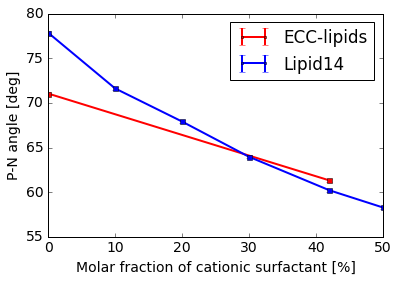

In [30]:
font = {'family' : 'DejaVu',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

fig, ax = plt.subplots()
# add some text for labels, title and axes ticks
ax.set_xlabel(r'Molar fraction of cationic surfactant [%]')
ax.set_ylabel(r'P-N angle [deg]')
#ax.set_ylim([-0.15,0.3])
#ax.set_xticks(r1)
#xlabelsl = list(xlabels)
#xlabelsl.extend(range(2, 18))
#ax.set_xticklabels(xlabelsl, rotation=0)

data = np.array(pndata)
ax.errorbar(data[:,0], data[:,1], yerr=0.15, lw=2.0, marker='s', markersize=5, color="red", label="ECC-lipids") #, c=colour, lw=1.0, label=point_label)
data_l14 = np.array(pndata_l14)
ax.errorbar(data_l14[:,0], data_l14[:,1], yerr=0.15, lw=2.0, marker='s', markersize=5, color="blue", label="Lipid14") #, c=colour, lw=1.0, label=point_label)
    
            


ax.legend(loc="upper right", markerscale=0.5, scatterpoints=4)
plt.savefig("PN_angle_L14-ECCL17_q80_sig89_surf.png", dpi=200)
plt.show()
